In [1]:
#Notes taken at a Women who code stats seminar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [85]:
path = r'adult_data.data'
df = pd.read_csv(path)
df.head(40)

,age,workclass,fnlwgt,education,years_educated,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,50kmoreless
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [16]:
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
years_educated     int64
marital_status    object
occupation        object
relationship      object
race              object
gender            object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
50kmoreless       object
dtype: object


In [18]:
#Pandas describe() is used to view some basic statistical details 
#like percentile, mean, std etc. of a data frame or a series of numeric values.
df.describe()

,age,fnlwgt,years_educated,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [17]:
df.describe(include=['object'])

,workclass,education,marital_status,occupation,relationship,race,gender,native_country,50kmoreless
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [19]:
duplicate = df.duplicated()
print(duplicate.sum())
df[duplicate]

24


,age,workclass,fnlwgt,education,years_educated,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,50kmoreless
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


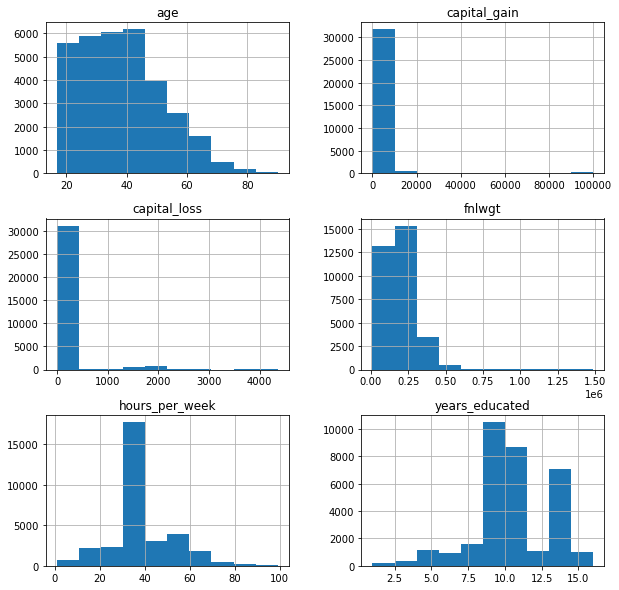

In [20]:
#histograms for each variable in df
hist = df.hist(bins=10,figsize =(10,10))

In [ ]:
# seaborn histogram
sns.distplot(df['symboling'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
n, bins, patches = plt.hist(x=d, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
# Add labels
plt.title('Histogram of Stroke')
plt.xlabel('stroke')
plt.ylabel('Density')

<AxesSubplot:xlabel='years_educated', ylabel='Count'>

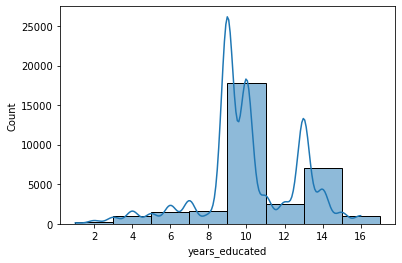

In [34]:
#A histogram is a classic visualization tool that represents the distribution of one or more variables 
#by counting the number of observations that fall within disrete bins.
sns.histplot(data=df, x="years_educated", bins=10,kde=True,binwidth=2)

<AxesSubplot:xlabel='Count', ylabel='years_educated'>

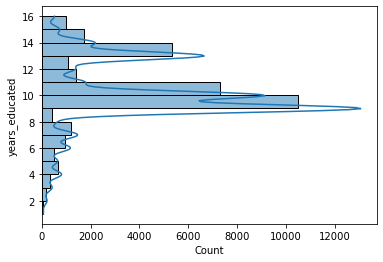

In [43]:
sns.histplot(data=df, y="years_educated", bins=10,kde=True,binwidth=1)

In [44]:
sns.histplot(data=df)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001889E46FC18> (for post_execute):


KeyboardInterrupt: 

<AxesSubplot:xlabel='hours_per_week', ylabel='Count'>

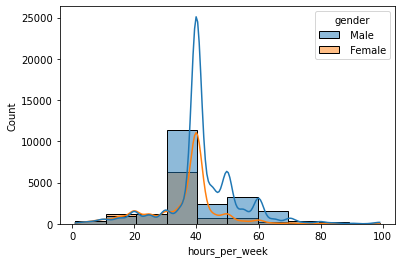

In [53]:
sns.histplot(data=df, x="hours_per_week", hue="gender",bins=10,kde=True)

<AxesSubplot:xlabel='gender', ylabel='Count'>

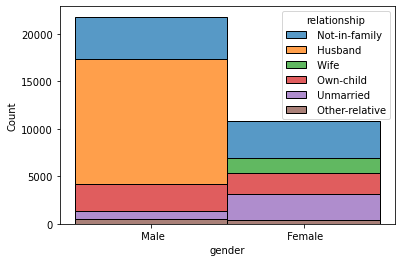

In [60]:
sns.histplot(data=df, x="gender", hue="relationship", multiple="stack")

<AxesSubplot:xlabel='age', ylabel='Count'>

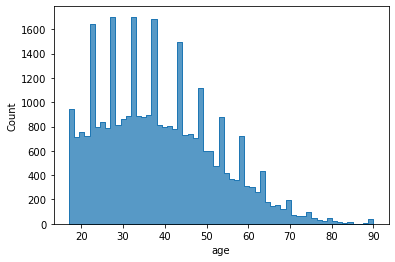

In [67]:
sns.histplot(data=df, x="age",element="step")

<AxesSubplot:xlabel='age', ylabel='Probability'>

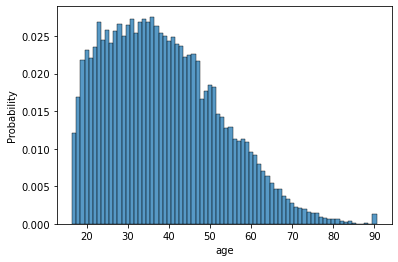

In [69]:
sns.histplot(data=df, x="age", stat="probability", discrete=True)

<AxesSubplot:xlabel='race', ylabel='Count'>

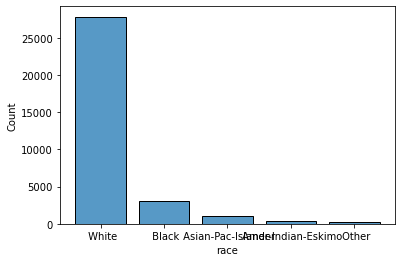

In [71]:
sns.histplot(data=df, x="race", shrink=.8)

(array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

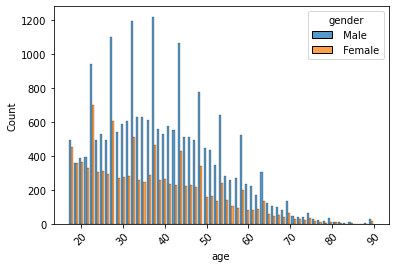

In [78]:
sns.histplot(data=df, x="age", hue="gender", multiple="dodge", shrink=.8)
plt.xticks(rotation=45)

In [ ]:
sns.displot(data=penguins, x="flipper_length_mm", kind="kde")

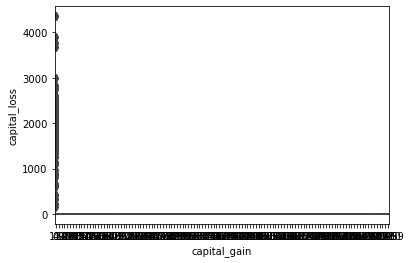

In [86]:
path = r'2006_-_2011_NYS_Math_Test_Results_by_Grade_-_Citywide_-_by_Race-Ethnicity.csv'
dftest = pd.read_csv(path)
dftest.head(40)



,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %
0,3,2006,Asian,9768,700,243,2.5,543,5.6,4128,42.3,4854,49.7,8982,92.0
1,4,2006,Asian,9973,699,294,2.9,600,6.0,4245,42.6,4834,48.5,9079,91.0
2,5,2006,Asian,9852,691,369,3.7,907,9.2,4379,44.4,4197,42.6,8576,87.0
3,6,2006,Asian,9606,682,452,4.7,1176,12.2,4646,48.4,3332,34.7,7978,83.1
4,7,2006,Asian,9433,671,521,5.5,1698,18.0,4690,49.7,2524,26.8,7214,76.5
5,8,2006,Asian,9593,675,671,7.0,1847,19.3,4403,45.9,2672,27.9,7075,73.8
6,3,2007,Asian,9750,706,156,1.6,402,4.1,3886,39.9,5306,54.4,9192,94.3
7,4,2007,Asian,9881,704,209,2.1,564,5.7,3968,40.2,5140,52.0,9108,92.2
8,5,2007,Asian,10111,700,211,2.1,626,6.2,4257,42.1,5017,49.6,9274,91.7
9,6,2007,Asian,9808,694,343,3.5,778,7.9,4356,44.4,4331,44.2,8687,88.6


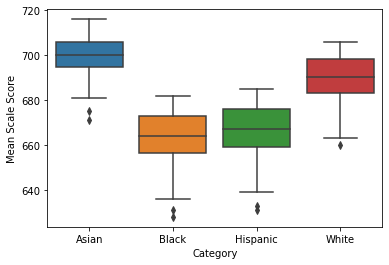

In [90]:
sns.boxplot(x = 'Category', y='Mean Scale Score', data =dftest)
plt.show()

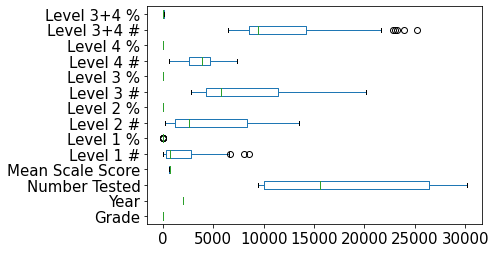

In [92]:
#create a boxplot for every column in df
boxplot = dftestest.boxplot(grid=False, vert=False,fontsize=15)